In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
X = pd.read_csv('linearX.csv')
Y = pd.read_csv('linearY.csv')

In [ ]:
X = X.iloc[:, -1]
Y = Y.iloc[:, -1]

In [ ]:
X.head()

0    8.0
1    9.1
2    8.4
3    6.9
4    7.7
Name: 9.1, dtype: float64

In [ ]:
Y.head()

0    0.99007
1    0.99769
2    0.99386
3    0.99508
4    0.99630
Name: 0.99523, dtype: float64

In [ ]:
m_numpy, b_numpy = np.polyfit(X, Y, 1)
print(f"Linear regression with NumPy. Slope: {m_numpy}. Intercept: {b_numpy}")

Linear regression with NumPy. Slope: 0.0007855593456459862. Intercept: 0.9903091984402583


In [ ]:
def pred_numpy(m, b, X):
    Y = m * X + b
    return Y

In [ ]:
X_pred = np.array([50, 120, 280])
Y_pred_numpy = pred_numpy(m_numpy, b_numpy, X_pred)

print(f"Predictor variable:\n{X_pred}")
print(f"Predictions of response variable using NumPy linear regression:\n{Y_pred_numpy}")

Predictor variable:
[ 50 120 280]
Predictions of response variable using NumPy linear regression:
[1.02958717 1.08457632 1.21026582]


In [ ]:
X_norm = (X - np.mean(X))/np.std(X)
Y_norm = (Y - np.mean(Y))/np.std(Y)

In [ ]:
def E(m, b, X, Y):
    return 1/(2*len(Y))*np.sum((m*X + b - Y)**2)

In [15]:
def dEdm(m, b, X, Y):
    res = 1/len(Y)*np.dot(m*X + b - Y, X)

    return res


def dEdb(m, b, X, Y):

    res = 1/len(Y)*np.sum(m*X + b - Y)

    return res


print(dEdm(0, 0, X_norm, Y_norm))
print(dEdb(0, 0, X_norm, Y_norm))
print(dEdm(1, 5, X_norm, Y_norm))
print(dEdb(1, 5, X_norm, Y_norm))


-0.6619554709942281
2.213437065508993e-15
0.3380445290057738
5.0000000000000036


In [16]:
# Function to calculate the gradient of the cost with respect to m
def dEdm(m, b, X, Y):
    return 2/len(Y) * np.dot((m*X + b - Y), X)

# Function to calculate the gradient of the cost with respect to b
def dEdb(m, b, X, Y):
    return 2/len(Y) * np.sum(m*X + b - Y)

# Function to perform batch gradient descent
def batch_gradient_descent(X, Y, learning_rate, iterations):
    m = 0
    b = 0
    cost_history = []

    for i in range(iterations):
        # Update parameters using batch gradient descent
        m = m - learning_rate * dEdm(m, b, X, Y)
        b = b - learning_rate * dEdb(m, b, X, Y)

        # Calculate and store the cost
        cost = np.mean((m*X + b - Y)**2)
        cost_history.append(cost)

    return m, b, cost_history
# Set hyperparameters
learning_rate_batch = 0.5
iterations_batch = 1000

# Perform linear regression using batch gradient descent
m_batch, b_batch, cost_history_batch = batch_gradient_descent(X_norm, Y_norm, learning_rate_batch, iterations_batch)

# Display the results
print("Batch Gradient Descent - Coefficients:")
print("Slope (m):", m_batch)
print("Intercept (b):", b_batch)

Batch Gradient Descent - Coefficients:
Slope (m): 0.6619554709942282
Intercept (b): -2.452583590762846e-15


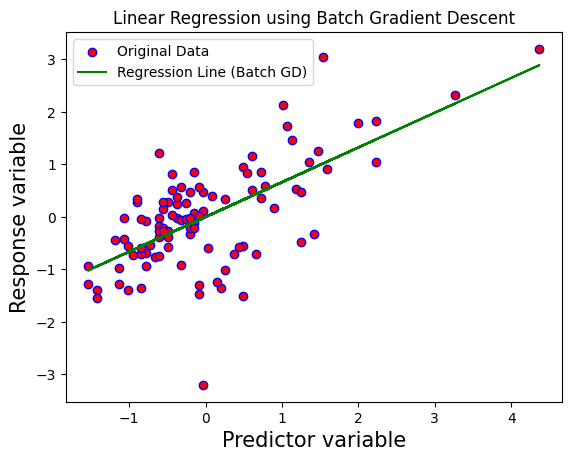

In [17]:
plt.scatter(X_norm, Y_norm, color="r", edgecolor="b", label="Original Data")
plt.plot(X_norm, m_batch*X_norm + b_batch, color="g", label="Regression Line (Batch GD)")
plt.xlabel('Predictor variable', fontsize=15)
plt.ylabel("Response variable", fontsize=15)
plt.title("Linear Regression using Batch Gradient Descent")
plt.legend()
plt.show()

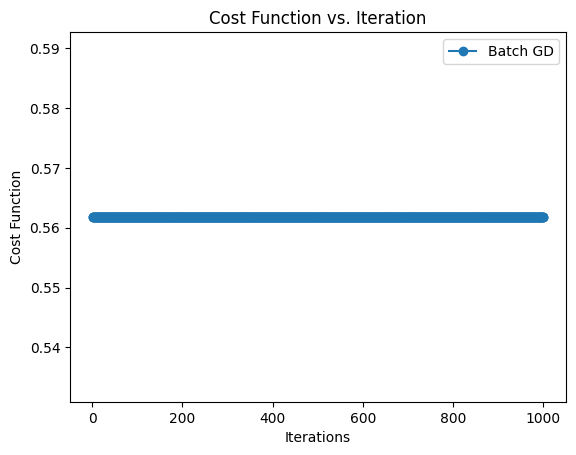

In [18]:
plt.plot(range(1, iterations_batch + 1), cost_history_batch, label='Batch GD', marker='o')
plt.xlabel('Iterations')
plt.ylabel('Cost Function')
plt.title('Cost Function vs. Iteration')
plt.legend()
plt.show()

In [19]:
# Function to calculate the gradient of the cost with respect to m
def dEdm(m, b, x, y):
    return 2 * x * (m*x + b - y)

# Function to calculate the gradient of the cost with respect to b
def dEdb(m, b, x, y):
    return 2 * (m*x + b - y)

# Function to perform stochastic gradient descent
def stochastic_gradient_descent(X, Y, learning_rate, iterations):
    m = 0
    b = 0
    cost_history = []

    for i in range(iterations):
        for j in range(len(Y)):
            # Update parameters using stochastic gradient descent
            m = m - learning_rate * dEdm(m, b, X[j], Y[j])
            b = b - learning_rate * dEdb(m, b, X[j], Y[j])

        # Calculate and store the cost
        cost = np.mean((m*X + b - Y)**2)
        cost_history.append(cost)

    return m, b, cost_history
# Set hyperparameters
learning_rate_stochastic = 0.01
iterations_stochastic = 1000

# Perform linear regression using stochastic gradient descent
m_stochastic, b_stochastic, cost_history_stochastic = stochastic_gradient_descent(X_norm, Y_norm, learning_rate_stochastic, iterations_stochastic)

# Display the results
print("Stochastic Gradient Descent - Coefficients:")
print("Slope (m):", m_stochastic)
print("Intercept (b):", b_stochastic)

Stochastic Gradient Descent - Coefficients:
Slope (m): 0.6358638969712458
Intercept (b): 0.03843935972402637


In [20]:
# Function to calculate the gradient of the cost with respect to m
def dEdm(m, b, X, Y):
    return 2/len(Y) * np.dot((m*X + b - Y), X)

# Function to calculate the gradient of the cost with respect to b
def dEdb(m, b, X, Y):
    return 2/len(Y) * np.sum(m*X + b - Y)

# Function to perform mini-batch gradient descent
def mini_batch_gradient_descent(X, Y, learning_rate, batch_size, iterations):
    m = 0
    b = 0
    cost_history = []

    for i in range(iterations):
        # Randomly shuffle the data
        permutation = np.random.permutation(len(Y))
        X_shuffled = X[permutation]
        Y_shuffled = Y[permutation]

        # Update parameters using mini-batch gradient descent
        for j in range(0, len(Y), batch_size):
            X_batch = X_shuffled[j:j+batch_size]
            Y_batch = Y_shuffled[j:j+batch_size]
            m = m - learning_rate * dEdm(m, b, X_batch, Y_batch)
            b = b - learning_rate * dEdb(m, b, X_batch, Y_batch)
        # Calculate and store the cost
        cost = np.mean((m*X + b - Y)**2)
        cost_history.append(cost)

    return m, b, cost_history

# Set hyperparameters
learning_rate_mini_batch = 0.5
batch_size = 20
iterations_mini_batch = 500

# Perform linear regression using mini-batch gradient descent
m_mini_batch, b_mini_batch, cost_history_mini_batch = mini_batch_gradient_descent(X_norm, Y_norm, learning_rate_mini_batch, batch_size, iterations_mini_batch)

# Display the results
print("Mini-Batch Gradient Descent - Coefficients:")
print("Slope (m):", m_mini_batch)
print("Intercept (b):", b_mini_batch)

Mini-Batch Gradient Descent - Coefficients:
Slope (m): 0.7214383302075629
Intercept (b): 0.015126309841288682


In [22]:
# Perform linear regression using mini-batch gradient descent
learning_rate_mini_batch = 0.1
batch_size_mini_batch = 20
iterations_mini_batch = 1000
m_mini_batch, b_mini_batch, cost_history_mini_batch = mini_batch_gradient_descent(X_norm, Y_norm, learning_rate_mini_batch, batch_size_mini_batch, iterations_mini_batch)


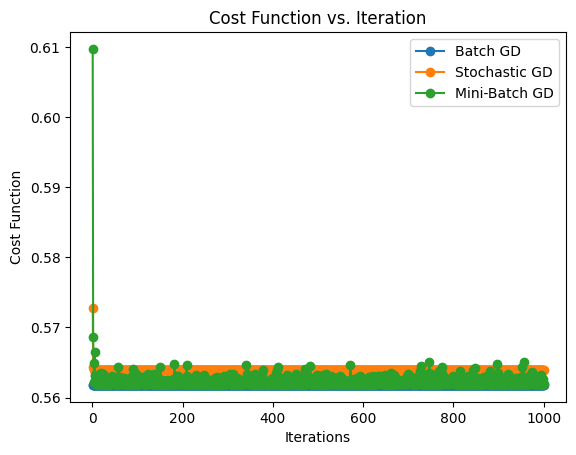

In [23]:
plt.plot(range(1, iterations_batch + 1), cost_history_batch, label='Batch GD', marker='o')
plt.plot(range(1, iterations_stochastic + 1), cost_history_stochastic, label='Stochastic GD', marker='o')
plt.plot(range(1, iterations_mini_batch + 1), cost_history_mini_batch, label='Mini-Batch GD', marker='o')

plt.xlabel('Iterations')
plt.ylabel('Cost Function')
plt.title('Cost Function vs. Iteration')
plt.legend()
plt.show()